## Load packages, data, and normalize data 

In [41]:
# pip install --upgrade pip

In [42]:
# pip install tensorflow

In [43]:
#  pip install keras

In [2]:
# Simple CNN model for CIFAR-10
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

Using TensorFlow backend.


In [3]:
from keras.callbacks import History 
history = History()

In [4]:
# Plot ad hoc CIFAR10 instances
from keras.datasets import cifar10
from matplotlib import pyplot
import numpy as np

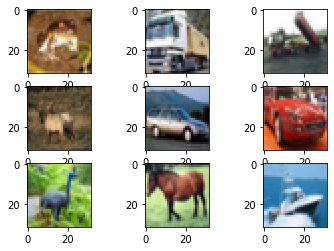

In [5]:
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# create a grid of 3x3 images
for i in range(0, 9):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(X_train[i])
# show the plot
pyplot.show()

In [6]:
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# Question 1

## Simple convolutional neural network

First, we will start with a very basic neural network. It starts with a convolutional input layer with 32 feature maps size 3x3, a rectifier activation function and a weight constraint of max norm set to 3. Dropout set to 20%. Next, it's another convolutional layer with similar 32 feature maps with a size of 3x3.Max Pool layer with size 2×2. After this, it's a fully connected layer with 512 units and a rectifier activation function.

As this is a very first model, we don't have much expectation. The hypothesis is that the accuracy is low because we only train with 2 layers before the fully connected layer with 521 units. 

In [8]:
# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile model
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)              

In [13]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 128s 3ms/step - loss: 2.3034 - accuracy: 0.0992 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 2/25
50000/50000 [==============================] - 127s 3ms/step - loss: 2.3031 - accuracy: 0.0974 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/25
50000/50000 [==============================] - 146s 3ms/step - loss: 2.3030 - accuracy: 0.0972 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/25
50000/50000 [==============================] - 123s 2ms/step - loss: 2.3029 - accuracy: 0.0968 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 5/25
50000/50000 [==============================] - 132s 3ms/step - loss: 2.3028 - accuracy: 0.0997 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 6/25
50000/50000 [==============================] - 129s 3ms/step - loss: 2.3029 - accuracy: 0.0981 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 7/25
50000/50000 [==============================] - 120s

Indeed, the accuracy result is very low. We need to do much more to improve the accurarcy. 

## Larger convolutional network

Let's try another more complex model. Now, the model has more layers. Besides the 2-layer original 32 feature maps with a size of 3x3 and a rectifier activation function, the network has 2 more layers with 64 feature maps with the size of 3x3 and 2 more layers on top of that with 128 feature maps with the size of 3x3.Instead of only 1 fully connected layer with 512 units, it has one more fully connected layer with 1024 units before. 

The expectation is that the result would be much better, because we allow the network to train on more layers, which increase the chance of correct classification. 

In [16]:
model1 = Sequential()
model1.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model1.add(Dropout(0.2))
model1.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model1.add(MaxPooling2D())
model1.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model1.add(Dropout(0.2))
model1.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model1.add(MaxPooling2D())
model1.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model1.add(Dropout(0.2))
model1.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model1.add(MaxPooling2D())
model1.add(Flatten())
model1.add(Dropout(0.2))
model1.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
model1.add(Dropout(0.2))
model1.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model1.add(Dropout(0.2))
model1.add(Dense(num_classes, activation='softmax'))

In [17]:
# Compile model
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model1.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model1.summary()
# Fit the model
scorestot = []
epochs=25
basic = model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=64)

# Final evaluation of the model
scores = model1.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_19 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_20 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 16, 16, 64)       

Indeed, the accuracy is 77.29%, which is pretty good. This should be the benchmark for the following models. 

# Question 2 

## Approach 1 - Changing elements of model

### 1.1. Change strides from 3x3 to 5x5, same number of epochs

Now, we will try a few other methods to see if we can improve the accuracy. 

The assumption is that increasing strides makes the model run faster. Furthermore, bigger strides will make the model cover more overlapping pixels. The hypothesis is that doing so might increase the model accuracy.

I only changed the stride value for every step. No other changes made.

In [10]:
# Create the model
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(32, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(128, (5, 5), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(128, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))


In [11]:
# Compile model
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.summary()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=64)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        2432      
_________________________________________________________________
dropout_9 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 32)        25632     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 64)        51264     
_________________________________________________________________
dropout_10 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 64)       

It turns out that model accuracy does not increase at all, or just increase by a very small margin. Therefore, we can conclude that increasing strides does not help the model become more accurate. Or probably the change in strides is too small to see any change. However, even if in the case of noticeable accuracy increase, it's not worth going this path at all, as the average training time for each epoch is 90 mins, which are far longer than the previous attempt. 

### 1.2. Cut first 2 CONV layers and 1 POOL layer, same number of epochs

We will focus on CONV layers in this context. This is because first, input layer has nothing to learn, what it does is just provide the input image’s shape. CONV layers are where the CNN learns so we will have weight matrices. POOL layer has no learnable parameters. 

I cut the first 2 CONV layers with 32 feature maps. The stride value is 5x5 (we showed above is that stride value - at least in this context - does not create much value). The hypothesis is that cutting CONV layers will reduce the number of parameters that the model needs to learn; therefore, we will at least reduce the training time. The accuracy might decrease, as we has fewer chances to update the parameters. 

In [8]:
# Create the model
model = Sequential()
model.add(Conv2D(64, (5, 5), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(128, (5, 5), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(128, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

In [9]:
# Compile model
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.summary()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=64)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        4864      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        102464    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       204928    
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 128)      

The accuracy decreases to 77.84%, which matches the hypothesis. However, an interesting finding is that the training time each step increases significantly. Therefore, we learned that cutting layers even makes the training time longer. This might be because doing so makes the backprop learning process more difficult, leading to an increase in training time.

### 1.3. Add 2 more CONV layers with feature size 16 each, same numer of epochs

This serves as an opposite approach to the previous experiment. Instead of cutting the CONV layers, we add 2 more CONV layers with 16 feature maps. First, the hypothesis is that training time should reduce. Second, it is expected that accuracy should increase because we allow more backprop learning here. 

The stride value is still 3x3, which is similar to Q1's neural networks.

In [8]:
# Create the model
model = Sequential()
model.add(Conv2D(16, (3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

In [9]:
# Compile model
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.summary()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=64)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 32)       

The hypothesis about training time is matched. The training time reduces much more to only around 3ms/ step. This confirms our expectation that increasing more CONV layers reduces the training time. Specifically, as we feed small feature map layers first, the backprop learning have more chances to filter. 

However, the accuracy decreases quite significantly to 72.34%. We might one to try increasing the number of epochs given the quick training time to see if we can improve accuracy.

### 1.4. Add more epochs

We know that last model gives us faster training time. Therefore, I want to increase the number of epochs for the previous model to see if accuracy can be improved. I changed number of epochs from 25 to 40 and see how it goes. 40 is somewhat an arbitrary number; however, it makes sense since the number of epochs margin between 2 runs is big enough to see any change in performance if there is any. Also, training 40 epochs will not take too much time, which is unnecessary if we increase the number of epochs much higher. 

In [42]:
# Create the model
model = Sequential()
model.add(Conv2D(16, (3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

In [11]:
# Compile model
epochs = 40
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.summary()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=64)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
dropout_8 (Dropout)          (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 16)        2320      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 32)        4640      
_________________________________________________________________
dropout_9 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 32)       

The result shows that it is not much of the difference. Accuracy is 77.88%. Therefore, we can conclude that this approach does not lead to significantly higher accuracy. 

## Approach 2 - Data Augmentation

Now I want to try another approach, which is data augmentation. The idea is that if the change is not from the model, it should be from the data. First, I write a function flipping image horizontally. Then I concatenate the current data set with the flipped data set in order to double the training set size. The expectation is that this would lead to higher accuracy, as we have done with the last feature transformation project.

In [7]:
#Flip the image horizontally 
def flip_image(data):
    flip = np.empty_like(data)
    for i in range(len(data)):
        img = data[i].tolist()
        img2 = [item[::-1] for item in img]
        img2 = np.array(img2)
        flip[i] = img2
    return flip

In [8]:
x_fl_merge = np.concatenate((X_train, flip_image(X_train)), axis = 0)

In [9]:
y_fl_merge = np.concatenate((y_train, y_train), axis = 0)

In [12]:
# Create the model
model_da = Sequential()
model_da.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model_da.add(Dropout(0.2))
model_da.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model_da.add(MaxPooling2D())
model_da.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_da.add(Dropout(0.2))
model_da.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_da.add(MaxPooling2D())
model_da.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_da.add(Dropout(0.2))
model_da.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_da.add(MaxPooling2D())
model_da.add(Flatten())
model_da.add(Dropout(0.2))
model_da.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
model_da.add(Dropout(0.2))
model_da.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model_da.add(Dropout(0.2))
model_da.add(Dense(num_classes, activation='softmax'))
# Compile model
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model_da.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model_da.summary()
# Fit the model
clf_flip = model_da.fit(x_fl_merge, y_fl_merge, validation_data=(X_test, y_test), epochs=epochs, batch_size=64)
# Final evaluation of the model
scores = model_da.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_13 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_14 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 16, 16, 64)       

The accuracy is 83.24%. This is a significant improvement. Therefore, the hypothesis is true: increasing training set and variations in training set should increase accuracy. 

# Conclusion & Visualize model performances

In conclusion, we learned that changing the model itself does not lead to an improvement in accuracy, but doing data augmentation does. 

For the same reason, I decided to create one figure analyzing model performance during training, comparing the 'basic' model (the one that I used as bench mark) and the 'data augmentation' model (without incorporating other changing-the-element models). 

It shows that throughout the epochs, accuracy increased the most until around 10th epoch, then increased with a smaller rate after 10th epoch. As mentioned, the data augmentation model yields much higher accuracy compared with the bench mark one, which we can see clearly through observation. 

Future approach should continue exploring the path of doing feature transformation with data to see if accuracy can be further improved.

In [40]:
# Get the accuracy of both models 
val_acc_flip = clf_flip.history['val_accuracy']
val_acc_basic = basic.history['val_accuracy']

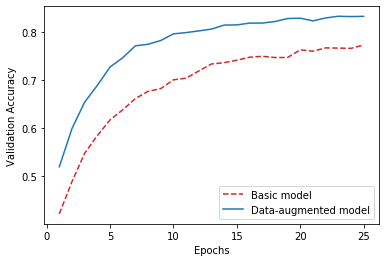

In [38]:
# Plot acurracy through training (through different epochs)
from matplotlib import pyplot as plt
fig, ax = plt.subplots()
ax.plot(list(range(1,26)), np.array(val_acc_basic), label='Basic model', color="tab:red", ls='--')
ax.plot(list(range(1,26)), np.array(val_acc_flip), label='Data-augmented model', color="tab:blue")
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
# plt.ylim([0.0, 0.7]);

ax.legend()
plt.show()

References
https://machinelearningmastery.com/object-recognition-convolutional-neural-networks-keras-deep-learning-library/

https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/

https://keras.io/preprocessing/image/